In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/home/ctchervenkov/Documents/projects/road_pricing/switzerland_10pct/emissionsPerPerson.csv", sep=";")

In [3]:
output_folder = "/home/ctchervenkov/Documents/projects/road_pricing/plots/"

In [4]:
# HEALTH COSTS
PM_g = df["PM"].sum()
PM_g_day = df["PM"].sum() * 10
PM_g_year = PM_g_day * 365
PM_ton_year = PM_g_year / 1e6
health_cost_per_ton_PM = (186000 + 260000)
health_cost_scaling_factor = (2370/2115)
health_cost_yearly = PM_ton_year * health_cost_per_ton_PM * health_cost_scaling_factor
print("HEALTH COSTS")
print("Our Estimate:",round(health_cost_yearly / 1e6),"M CHF / year")
print("ARE Estimate:",str(2039),"M CHF / year")

HEALTH COSTS
Our Estimate: 295.0 M CHF / year
ARE Estimate: 2039 M CHF / year


/home/ctchervenkov/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


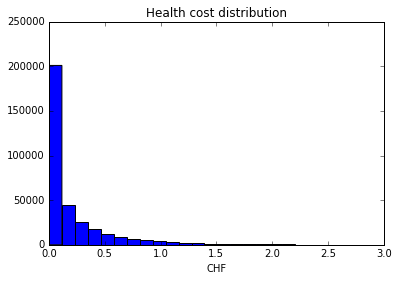

MEAN HEALTH COST: 0.237412911829


In [5]:
health_cost_per_person = df["PM"] * health_cost_per_ton_PM * health_cost_scaling_factor / 1e6
plt.hist(health_cost_per_person, bins=100)
plt.xlim((0,3))
plt.xlabel("CHF")
plt.title("Health cost distribution")
#plt.ylabel("Occurence")
plt.savefig(output_folder + "health_costs.pdf")
plt.savefig(output_folder + "health_costs.png")
plt.show()

print("MEAN HEALTH COST:", health_cost_per_person.mean())

In [6]:
# CLIMATE COSTS
CO2_g = df["CO2(total)"].sum()
CO2_g_year = CO2_g * 10 * 365
CO2_ton_year = CO2_g_year / 1e6
climate_cost_per_ton_CO2 = 121.5
climate_costs_yearly = CO2_ton_year * climate_cost_per_ton_CO2
print("CLIMATE COSTS")
print("Our Estimate:",round(climate_costs_yearly / 1e6),"M CHF / year")
print("ARE Estimate:",str(1182),"M CHF / year")

CLIMATE COSTS
Our Estimate: 1102.0 M CHF / year
ARE Estimate: 1182 M CHF / year


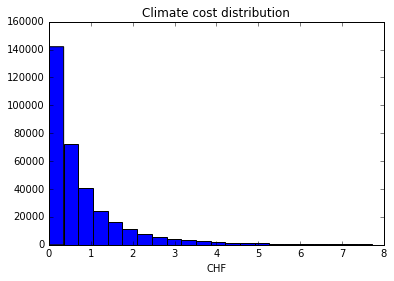

MEAN CLIMATE COST: 0.886487574669


In [7]:
climate_cost_per_person = df["CO2(total)"] * climate_cost_per_ton_CO2 / 1e6
plt.hist(climate_cost_per_person, bins=100)
plt.xlim((0,8))
plt.xlabel("CHF")
plt.title("Climate cost distribution")
#plt.ylabel("Occurence")
plt.savefig(output_folder + "climate_costs.pdf")
plt.savefig(output_folder + "climate_costs.png")
plt.show()

print("MEAN CLIMATE COST:", climate_cost_per_person.mean())

In [8]:
# DAMAGES TO BUILDINGS
PM_g = df["PM"].sum()
PM_g_year = PM_g * 10 * 365
PM_ton_year = PM_g_year / 1e6
building_cost_per_ton = (45000 + 21000)
building_scaling_factor = (100/88.3)
building_cost_yearly = PM_ton_year * building_cost_per_ton * building_scaling_factor
print("DAMAGES TO BUILDINGS")
print("Our Estimate:",round(building_cost_yearly / 1e6),"M CHF / year")
print("ARE Estimate:",str(154),"M CHF / year")

DAMAGES TO BUILDINGS
Our Estimate: 44.0 M CHF / year
ARE Estimate: 154 M CHF / year


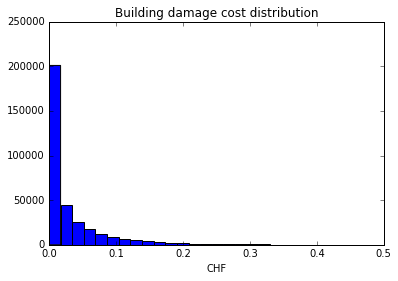

MEAN BUILDING COST: 0.0355070615971


In [9]:
building_cost_per_person = df["PM"] * building_cost_per_ton * building_scaling_factor / 1e6
plt.hist(building_cost_per_person, bins=100)
plt.xlim((0,0.5))
plt.xlabel("CHF")
plt.title("Building damage cost distribution")
#plt.ylabel("Occurence")
plt.savefig(output_folder + "building_costs.pdf")
plt.savefig(output_folder + "building_costs.png")
plt.show()

print("MEAN BUILDING COST:", building_cost_per_person.mean())

In [10]:
# CROP AND FOREST DAMAGES
NOx_g = df["NOx"].sum()
NOx_year = NOx_g * 10 * 365
NOx_ton_year = NOx_year / 1e6
crop_loss_cost_per_ton = (3100)
crop_loss_scale_factor = (102/100)
crop_loss_yearly = NOx_ton_year * crop_loss_cost_per_ton * crop_loss_scale_factor 
print("CROP LOSS & FOREST DAMAGES")
print("Our Estimate:",round(crop_loss_yearly / 1e6),"M CHF / year")
print("ARE Estimate:",str(36+34),"M CHF / year")

CROP LOSS & FOREST DAMAGES
Our Estimate: 50.0 M CHF / year
ARE Estimate: 70 M CHF / year


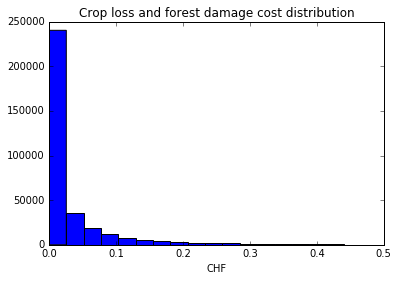

MEAN CROP COST: 0.0403335538939


In [11]:
crop_loss_per_person = df["NOx"] * crop_loss_cost_per_ton * crop_loss_scale_factor / 1e6;
plt.hist(crop_loss_per_person, bins=100)
plt.xlim((0,0.5))
plt.xlabel("CHF")
plt.title("Crop loss and forest damage cost distribution")
#plt.ylabel("Occurence")
plt.savefig(output_folder + "crop_forest_costs.pdf")
plt.savefig(output_folder + "crop_forest_costs.png")
plt.show()

print("MEAN CROP COST:", crop_loss_per_person.mean())

In [12]:
emission_cost_yearly = climate_costs_yearly + health_cost_yearly + building_cost_yearly + crop_loss_yearly
are_emissions_cost_yearly = 1182 + 2039 + 154 + 36 + 34
print("Our Estimate:",round(emission_cost_yearly / 1e6),"M CHF / year")
print("ARE Estimate:",str(are_emissions_cost_yearly),"M CHF / year")

Our Estimate: 1491.0 M CHF / year
ARE Estimate: 3445 M CHF / year


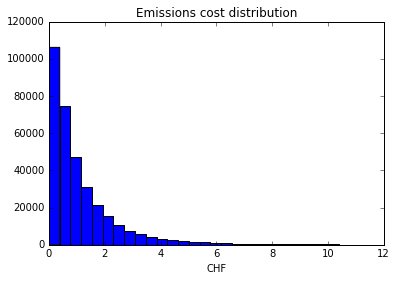

MEAN EMISSION COST: 1.19974110199


In [13]:
emission_cost_per_person = climate_cost_per_person + health_cost_per_person + building_cost_per_person + crop_loss_per_person
plt.hist(emission_cost_per_person, bins=100)
plt.xlim((0,12))
plt.xlabel("CHF")
plt.title("Emissions cost distribution")
#plt.ylabel("Occurence")
plt.savefig(output_folder + "emission_costs.pdf")
plt.savefig(output_folder + "emission_costs.png")
plt.show()

print("MEAN EMISSION COST:", emission_cost_per_person.mean())